In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/03%20Abalone%20Age%20dataset/abalone.csv')

In [3]:
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.columns=['Sex','Length','Diameter','Heigth','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Ringes']

In [5]:
data.head(2)

,Sex,Length,Diameter,Heigth,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Ringes
0,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
1,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [6]:
data.tail(2)

,Sex,Length,Diameter,Heigth,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Ringes
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [7]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Heigth            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Ringes            0
dtype: int64

In [8]:
data1=data.drop('Sex',axis=1)

In [9]:
data1

,Length,Diameter,Heigth,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Ringes
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


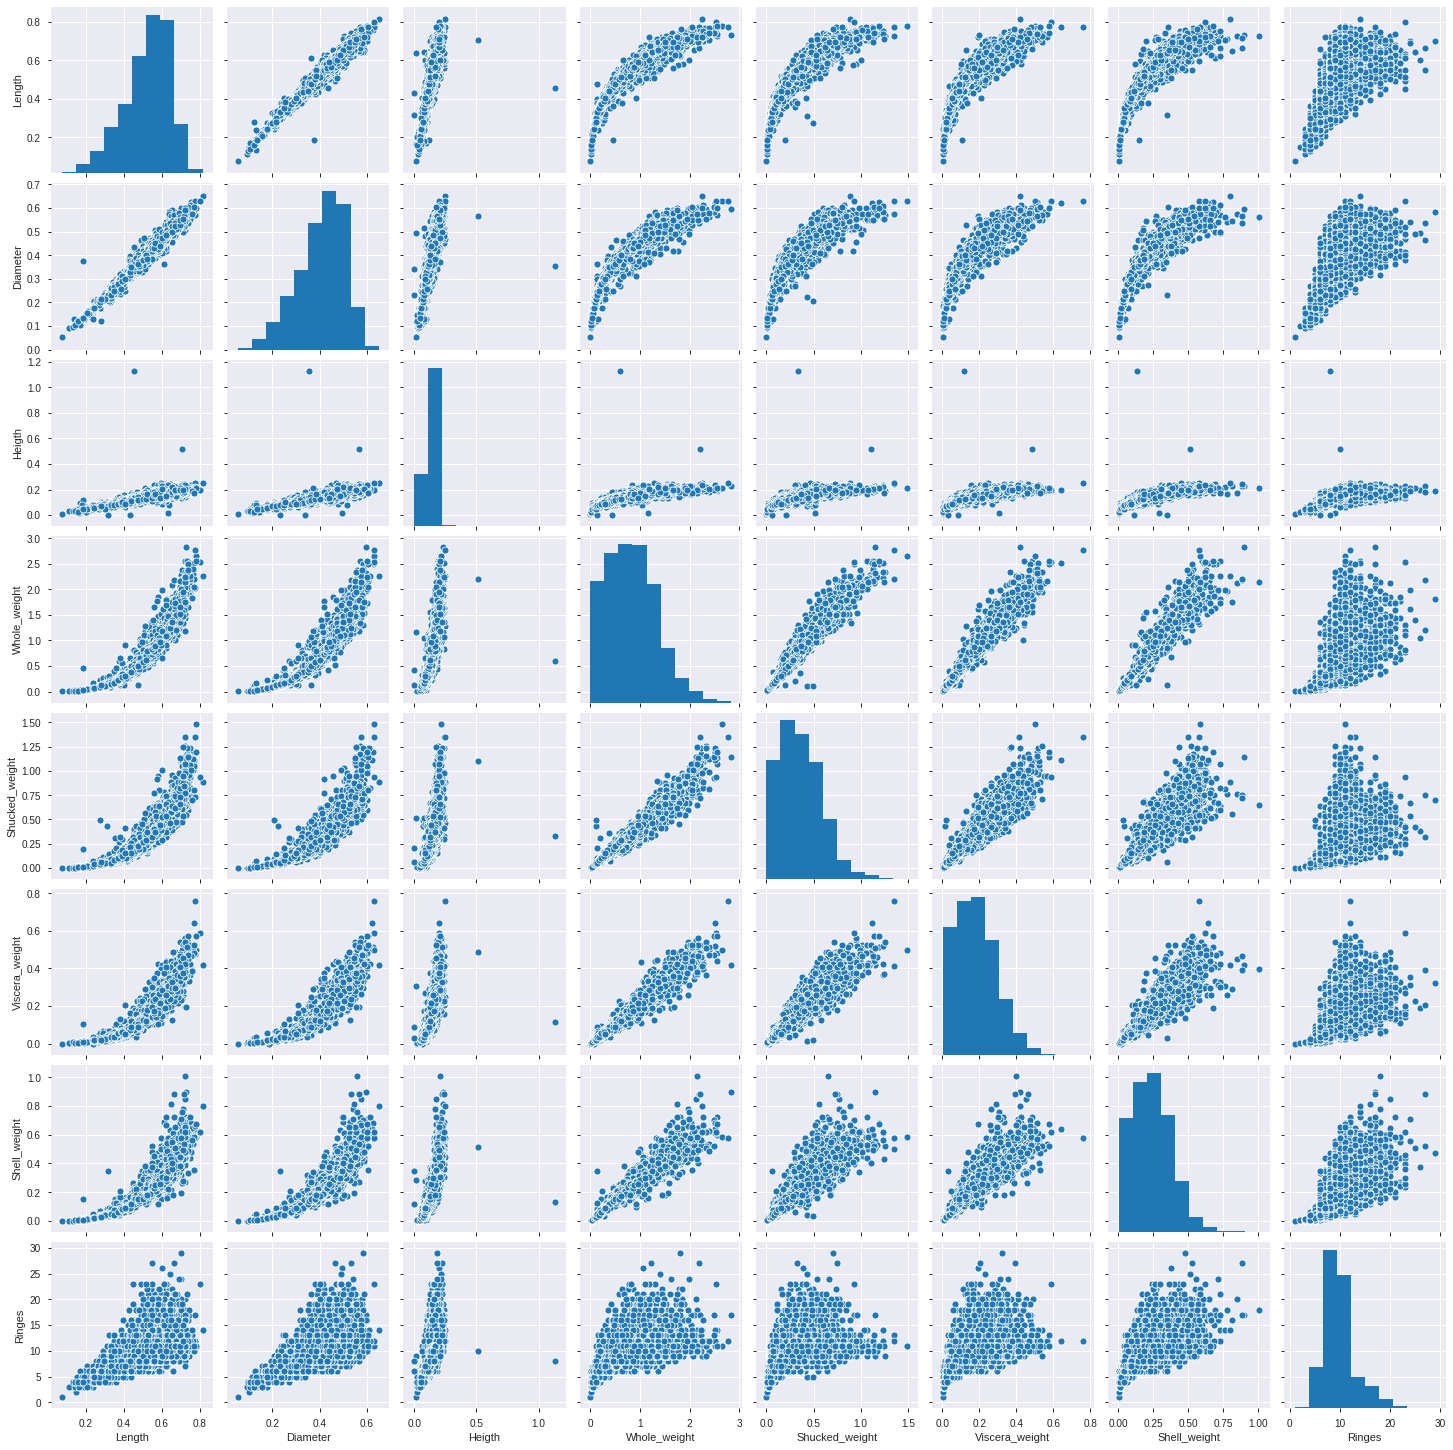

In [10]:
sns.pairplot(data1)

In [11]:
pandas_profiling.ProfileReport(data1)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4176 non-null   float64
 1   Diameter        4176 non-null   float64
 2   Heigth          4176 non-null   float64
 3   Whole_weight    4176 non-null   float64
 4   Shucked_weight  4176 non-null   float64
 5   Viscera_weight  4176 non-null   float64
 6   Shell_weight    4176 non-null   float64
 7   Ringes          4176 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.1 KB


In [13]:
data1.describe()

,Length,Diameter,Heigth,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Ringes
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [14]:
data1.columns


Index(['Length', 'Diameter', 'Heigth', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Ringes'],
      dtype='object')

In [15]:
x_data=data1[['Length', 'Diameter', 'Heigth', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']]

In [16]:
x_data

,Length,Diameter,Heigth,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [17]:
y_data=data1['Ringes']

In [18]:
y_data

0        7
1        9
2       10
3        7
4        8
        ..
4171    11
4172    10
4173     9
4174    10
4175    12
Name: Ringes, Length: 4176, dtype: int64

In [19]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=0.30,random_state=10)

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(X_traine,Y_traine)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
X_traine.shape

(2923, 7)

In [23]:
Y_traine.shape

(2923,)

In [24]:
X_test.shape

(1253, 7)

In [25]:
Y_test.shape

(1253,)

In [26]:
train_score=lr.score(X_traine,Y_traine)
train_score

0.5219464943628251

In [27]:
test_score=lr.score(X_test,Y_test)
test_score

0.5414086319970439

In [28]:
lr.coef_

array([ -1.96808593,  13.73196271,  11.42816222,  10.48487623,
       -21.39577516, -11.52073895,   7.71534238])

In [29]:
lr.intercept_

3.04901590709356

In [30]:
rr=Ridge(alpha=0.01)
rr.fit(X_traine,Y_traine)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
rr.coef_

array([ -1.82180503,  13.54168   ,  11.37829828,  10.43282018,
       -21.34357127, -11.43775904,   7.77818632])

In [32]:
rr.intercept_

3.0513281620265538

In [33]:
Ridge_train_score=rr.score(X_traine,Y_traine)
Ridge_train_score

0.5219447582770553

In [34]:
Ridge_test_score=rr.score(X_test,Y_test)
Ridge_test_score

0.5415446904846147

In [35]:
rr100=Ridge(alpha=100)
rr100.fit(X_traine,Y_traine)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
Ridge_train_score100=rr100.score(X_traine,Y_traine)
Ridge_train_score100

0.32295951742110784

In [37]:
Ridge_test_score100=rr100.score(X_test,Y_test)
Ridge_test_score100

0.3508045416702731

In [38]:
rr100.coef_

array([ 1.05135882,  1.03427861,  0.60591785,  2.57419068, -0.93263604,
        0.34689154,  2.02311566])

In [39]:
rr100.intercept_

6.588660572627274

In [40]:
lo=Lasso(alpha=(0.01)**2)
lo.fit(X_traine,Y_traine)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
lo.coef_

array([ -1.40917577,  13.0741272 ,  11.28984293,  10.40255054,
       -21.33185219, -11.3536752 ,   7.80344497])

In [42]:
lo.intercept_

3.0377950742728386

In [43]:
Lasso_train_score=lo.score(X_traine,Y_traine)
Lasso_train_score

0.5219319793841327

In [44]:
Lasso_test_score=lo.score(X_test,Y_test)
Lasso_test_score

0.5416817743402749

In [45]:
lo100=Lasso(alpha=(100)**2)
lo100.fit(X_traine,Y_traine)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
lo100.coef_

array([0., 0., 0., 0., 0., 0., 0.])

In [47]:
lo100.intercept_

9.996236743072187

In [48]:
Lasso_train_score100=lo100.score(X_traine,Y_traine)
Lasso_train_score100

0.0

In [49]:
Lasso_test_score100=lo100.score(X_test,Y_test)
Lasso_test_score100

-0.004919864587216827

In [50]:
print("linear regression trine score",train_score)
print("linear regression test score",test_score)
print("linear regression trine score low_alpha",Ridge_train_score)
print("linear regression test score high_alpha",Ridge_test_score)
print("linear regression trine score low_alpha",Ridge_train_score100)
print("linear regression test score high_alpha",Ridge_test_score100)
print("linear regression trine score low_alpha",Lasso_train_score)
print("linear regression test score high_alpha",Lasso_test_score)
print("linear regression trine score low_alpha",Lasso_train_score100)
print("linear regression test score high_alpha",Lasso_test_score100)

linear regression trine score 0.5219464943628251
linear regression test score 0.5414086319970439
linear regression trine score low_alpha 0.5219447582770553
linear regression test score high_alpha 0.5415446904846147
linear regression trine score low_alpha 0.32295951742110784
linear regression test score high_alpha 0.3508045416702731
linear regression trine score low_alpha 0.5219319793841327
linear regression test score high_alpha 0.5416817743402749
linear regression trine score low_alpha 0.0
linear regression test score high_alpha -0.004919864587216827


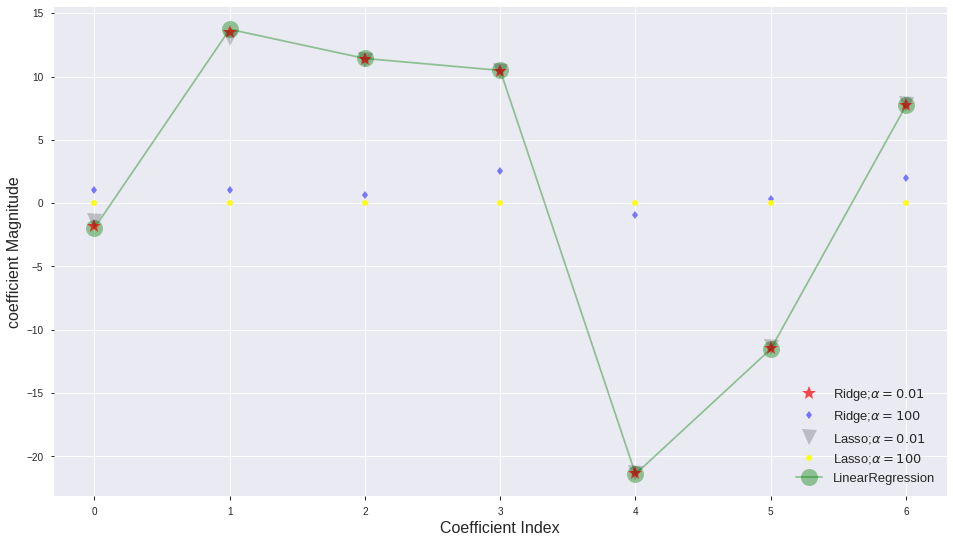

In [51]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge;$\alpha=100$',zorder=7)
plt.plot(lo.coef_,alpha=0.2,linestyle='none',marker='v',markersize=15,color='black',
         label=r'Lasso;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(lo100.coef_,alpha=0.9,linestyle='none',marker='8',markersize=6,color='yellow',
         label=r'Lasso;$\alpha=100$',zorder=7)

#alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='LinearRegression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [52]:
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge,ElasticNet
Lasso_CV=LassoCV()
Ridge_CV=RidgeCV()
rr=Ridge()
Lo=Lasso()
ENET=ElasticNet()

In [53]:
Lasso_CV.fit(X_traine,Y_traine)
Ridge_CV.fit(X_traine,Y_traine)
rr.fit(X_traine,Y_traine)
Lo.fit(X_traine,Y_traine)
ENET.fit(X_traine,Y_traine)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
Predicate=pd.DataFrame({'Lasso_CV_pred':Lasso_CV.predict(X_test),
            'Ridge_CV_pred':Ridge_CV.predict(X_test),
                        'rr':rr.predict(X_test),
                        'Lo':Lo.predict(X_test),'Actual_data':Y_test})
Predicate

,Lasso_CV_pred,Ridge_CV_pred,rr,Lo,Actual_data
1080,7.609013,7.624458,7.624458,9.996237,6
1371,10.452526,10.602934,10.602934,9.996237,12
3853,11.707666,11.571765,11.571765,9.996237,11
235,4.370749,4.054672,4.054672,9.996237,1
2142,9.015748,9.007232,9.007232,9.996237,10
...,...,...,...,...,...
853,9.356679,9.406288,9.406288,9.996237,10
3144,10.675114,10.601730,10.601730,9.996237,13
484,11.610180,11.690601,11.690601,9.996237,13
1179,11.501324,11.299271,11.299271,9.996237,11


In [55]:
#Recursive Feature Elimination:The Syntax
#import the class containing the feature selection method 
from sklearn.feature_selection import RFE

In [56]:
#create an instance of the class
rfeMod=RFE(rr,n_features_to_select=7)

In [57]:
#fit the instance on the data and then predict the expected value
rfeMod=rfeMod.fit(X_traine,Y_traine)
Y_predict=rfeMod.predict(X_test)

In [58]:
Y_predict

array([ 7.62445777, 10.60293425, 11.57176507, ..., 11.69060055,
       11.29927106, 14.18968269])

In [59]:
Y_test

1080     6
1371    12
3853    11
235      1
2142    10
        ..
853     10
3144    13
484     13
1179    11
3366    17
Name: Ringes, Length: 1253, dtype: int64